In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.datasets import load_iris

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
df = pd.read_csv('df_dummy.csv')
print(f'Tem algum dado vazio? {df.isna().sum().sum()}')
print(f'Tem algum dado duplicado? {df.duplicated().sum()}')
print(f'\nTem algum qualitativo(String) ? \n{df.info()}')

Tem algum dado vazio? 0
Tem algum dado duplicado? 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    6770 non-null   int64  
 1   posse_de_veiculo                        6770 non-null   int64  
 2   posse_de_imovel                         6770 non-null   int64  
 3   qtd_filhos                              6770 non-null   int64  
 4   idade                                   6770 non-null   float64
 5   tempo_emprego                           6770 non-null   float64
 6   possui_celular                          6770 non-null   int64  
 7   possui_fone_comercial                   6770 non-null   int64  
 8   possui_fone                             6770 non-null   int64  
 9   possui_email                            6770 non-null   int64  
 10  qt_pesso

In [3]:
y = df.mau
X = df.drop('mau', axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(f'Percentual y_train (target): {y_train.count()/(y_train.count()+y_test.count())*100}%')
print(f'Percentual y_test (target): {y_test.count()/(y_train.count()+y_test.count())*100}%')

print(f'\nValores numéricos (0 e 1) de "mau" do y_train (target):\n{y_train.value_counts()}')
print(f'\nValores numéricos (0 e 1) de "mau" do y_test (target):\n{y_test.value_counts()}')

Percentual y_train (target): 70.0%
Percentual y_test (target): 30.0%

Valores numéricos (0 e 1) de "mau" do y_train (target):
mau
0    4536
1     203
Name: count, dtype: int64

Valores numéricos (0 e 1) de "mau" do y_test (target):
mau
0    1936
1      95
Name: count, dtype: int64


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [11]:
#2) 1. e 2. Defina um objeto coma função da árvore e Treine o modelo.
clf1 = DecisionTreeClassifier(random_state=123)
clf1 = clf1.fit(X_train, y_train)

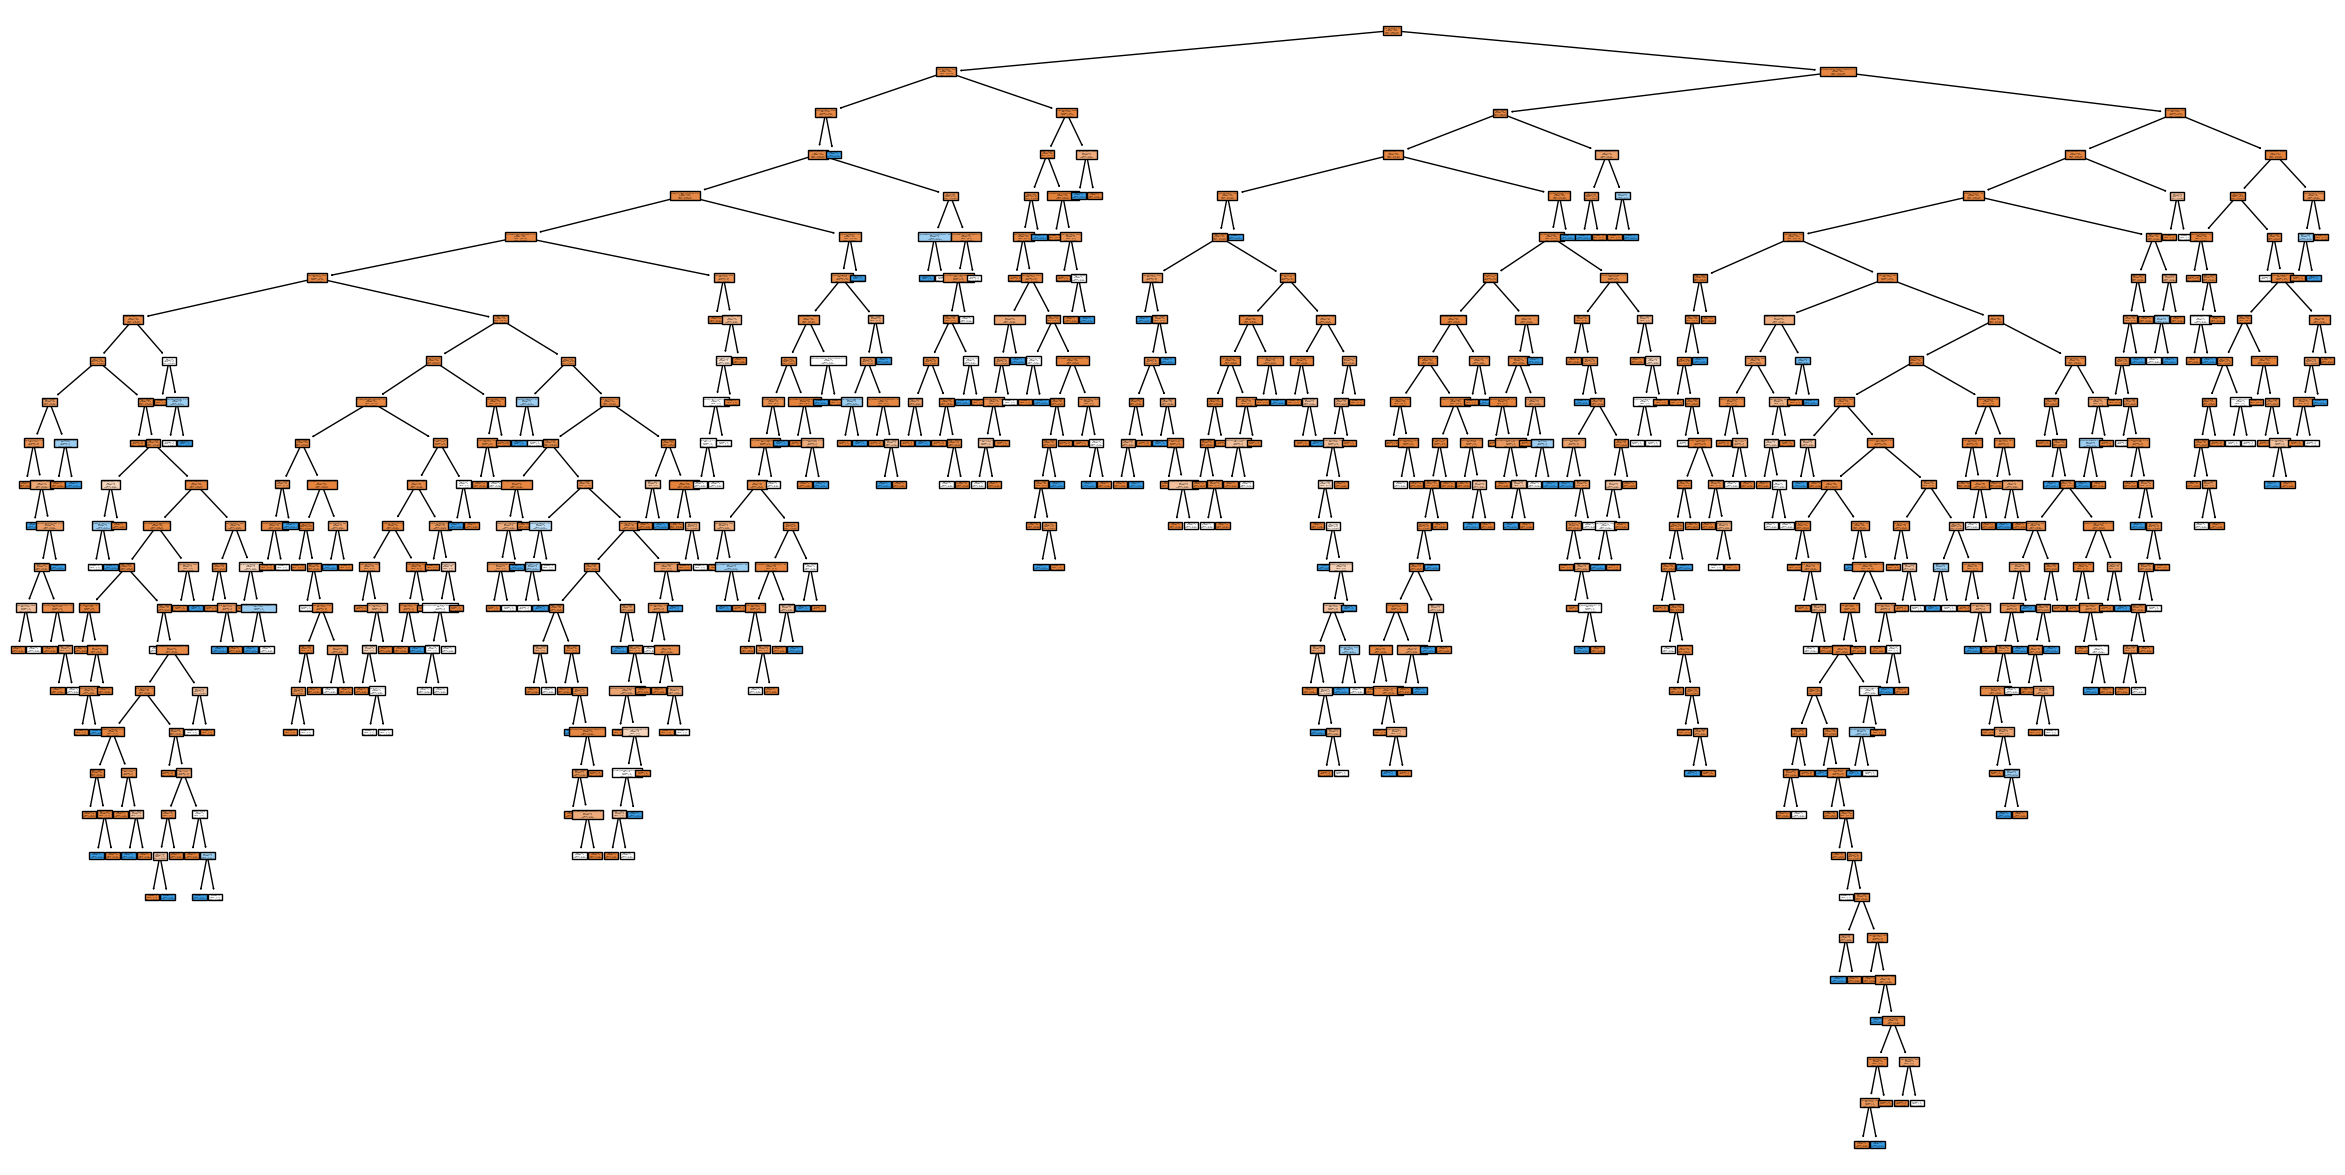

In [12]:
#2) 3. Visualize a árvore.
plt.figure(figsize=(30,15))
plot_tree(clf1,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=list(X_train.columns));
plt.savefig('ArvoreDecisaoTrain.png', dpi=600)

accuracy_score (Train): 97.72%


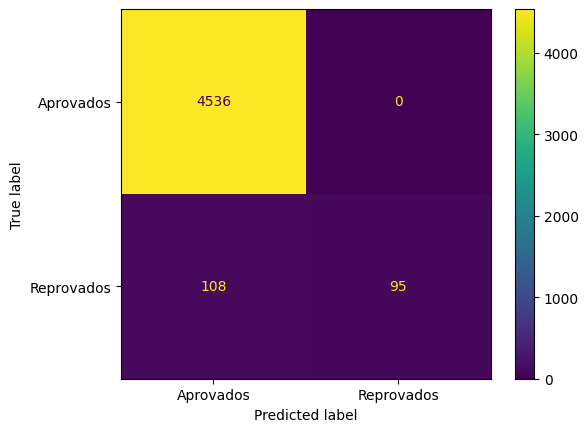

In [7]:
#2) 4. e 5. Matriz da Confusão do Treino e Cálculo da Acurácia do Treino.
y_predict_train = clf1.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp_train.plot()
print(f'accuracy_score (Train): {(accuracy_score(y_train, y_predict_train)*100).round(2)}%')

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

accuracy_score (Train): 97.72%
accuracy_score (Test): 98.08%


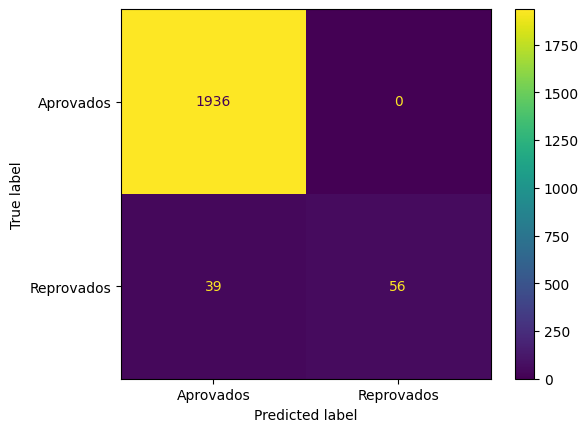

In [8]:
#3) 1. 2. 3. Classifique a base de teste, Matriz da Confusão do Teste, Cálculo da Acurácia do Teste e comparativo da Acurária entre Treino e Teste.
y_predict_test1 = clf1.predict(X_test)
cm1 = confusion_matrix(y_test, y_predict_test1)
disp_test1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Aprovados', 'Reprovados'])
disp_test1.plot()
print(f'accuracy_score (Train): {(accuracy_score(y_train, y_predict_train)*100).round(2)}%')
print(f'accuracy_score (Test): {(accuracy_score(y_test, y_predict_test1)*100).round(2)}%')

accuracy_score (Test 2): 94.44%
Dos 2031 dados existentes no y_test, 22 foram classificados como "mau" neste novo teste.

Proporção de proponentes classificados como "maus": 1.08%


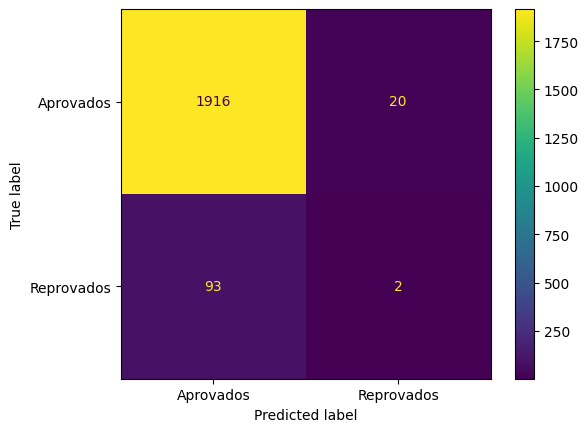

In [9]:
#3) 4. Treine uma nova árvore com min_samples_leaf=5 e max_depth=10.
clf2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=100, random_state=123)
clf2 = clf2.fit(X_train, y_train)
y_predict_test2 = clf2.predict(X_test)
cm2 = confusion_matrix(y_test, y_predict_test2)
disp_test2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Aprovados', 'Reprovados'])
disp_test2.plot()
print(f'accuracy_score (Test 2): {accuracy_score(y_test, y_predict_test2).round(4)*100}%')
print(f'Dos {y_test.count()} dados existentes no y_test, {y_predict_test2.sum()} foram classificados como "mau" neste novo teste.\n')
print(f'Proporção de proponentes classificados como "maus": {(y_predict_test2.sum()/y_test.count()*100).round(2)}%')

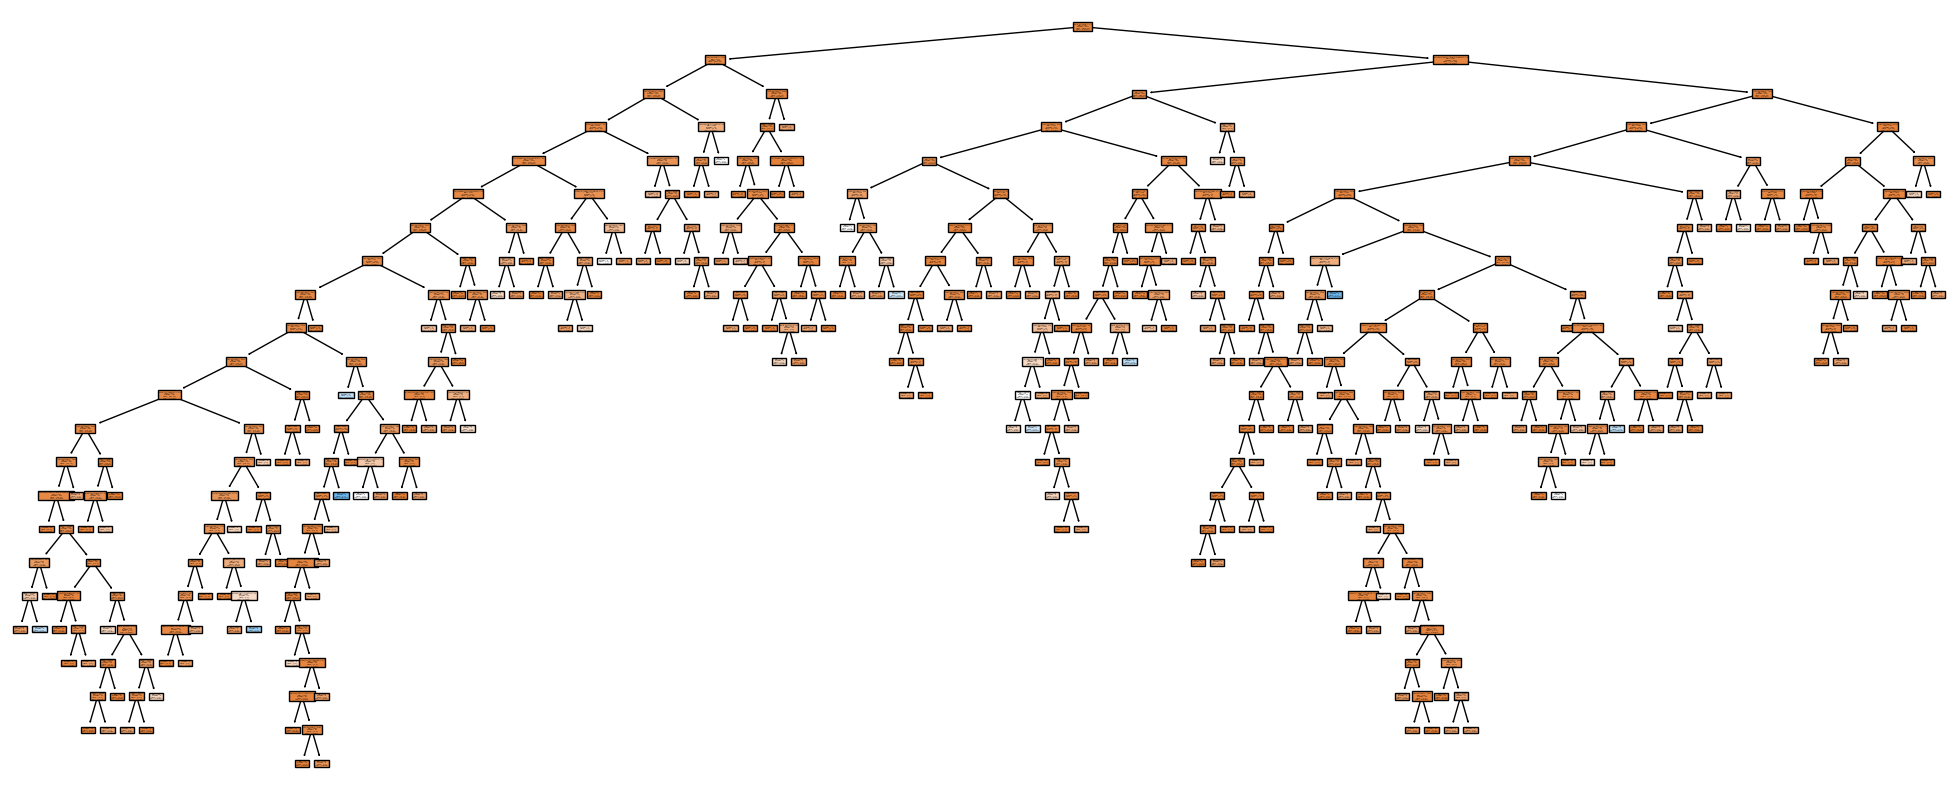

In [13]:
#3) 4. Treine uma nova árvore com min_samples_leaf=5 e max_depth=10.
#3) 4. Visualização da árvore.
plt.figure(figsize=(25,10))
plot_tree(clf2,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=list(X_test.columns));
plt.savefig('ArvoreDecisaoTeste2.png', dpi=600)

In [14]:
#3) 5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?
print(f'Bons (Corretos): {cm2[0,0]}')
print(f'Maus (Corretos): {cm2[1,1]}')
print(f'Bons (Errados): {cm2[1,0]}')
print(f'Maus (Errados): {cm2[0,1]}')

print(f'\naccuracy_score (Se todos forem "bons"): {((cm2[0,0]+cm2[0,1])/y_test.count()*100).round(2)}%\n')

print(f'Bons (Corretos): {cm2[0,0]+cm2[0,1]}')
print(f'Bons (Errados): {cm2[1,0]+cm2[1,1]}')

Bons (Corretos): 1916
Maus (Corretos): 2
Bons (Errados): 93
Maus (Errados): 20

accuracy_score (Se todos forem "bons"): 95.32%

Bons (Corretos): 1936
Bons (Errados): 95
